# Introduction
Coronavirus disease 2019 (COVID-19) time series listing confirmed cases, reported deaths, and reported recoveries. Data is disaggregated by country (and sometimes sub region). Coronavirus disease (COVID-19) is caused by Severe acute respiratory syndrome Coronavirus 2 (SARS-CoV-2) and has had a worldwide effect. On March 11, 2020, the World Health Organization (WHO) declared it a pandemic, pointing to the over 118,000 cases of the coronavirus illness in over 110 countries and territories around the world at the time.

This dataset includes data for tracking the number of people affected by COVID-19 worldwide, including:

confirmed tested cases of Coronavirus infection
the number of people who have reportedly died while sick with Coronavirus
the number of people who have reportedly recovered from it


In [35]:
import warnings
import itertools
import datetime
import numpy as np#Linear algebra
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #datavisualization
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'






In [36]:
df = pd.read_csv("covid19.csv")

In [37]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [38]:
try :
    df.drop('Unnamed: 9',axis=1,inplace= True)
    df.shape
except : 
    print('Done')

Done


In [39]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [41]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [42]:
df.corr()

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


In [43]:
print(df['Deaths'].unique())

[    0    17    18 ...  4397 98913 37130]


In [51]:
try :
    a=[]
    for i in df['Deaths'].values:
        if '\xa0' in i:
            a.append(int(i.replace("\xa0", '')))
        else:
            a.append(int(i))

    df['Deaths'] = a
    len(a)
except:
    pass

In [45]:
print(df['Deaths'].unique())

[    0    17    18 ...  4397 98913 37130]


In [46]:
df['Deaths'].astype('int64')

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23688, dtype: int64

In [47]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [48]:
len(df['Country'].unique())

188

In [49]:
def drop_star(df):
    for i in df['Country'].iteritems():
        if i[1][-3:] == "***":
            df.drop(i[0],inplace=True)
        
drop_star(df)
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [50]:
len(df['Country'].unique())

188

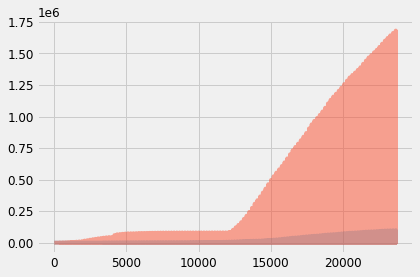

In [17]:
df['Deaths'].plot(alpha=0.3)
df['Confirmed'].plot(alpha=0.5)
plt.show()

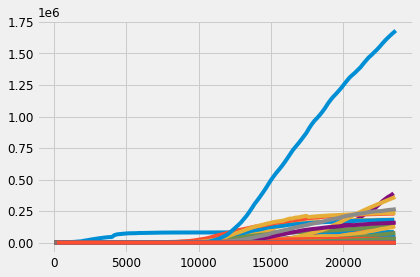

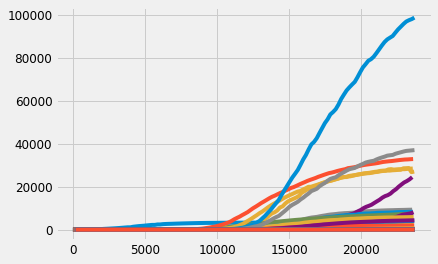

In [18]:
df.groupby('Country')['Confirmed'].plot()
plt.show()
df.groupby('Country')['Deaths'].plot()
plt.show()

In [19]:
l = df.groupby('Country')
current = l.last()

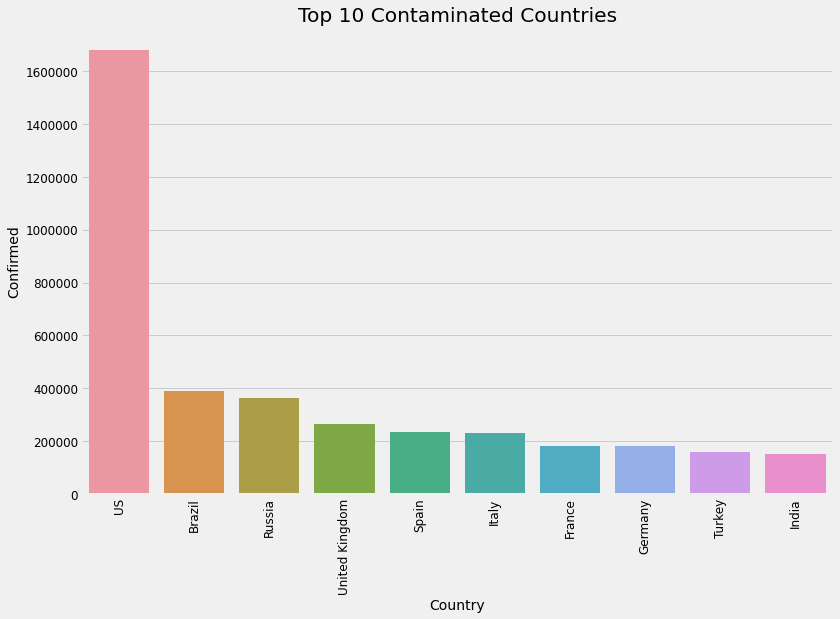

In [20]:
fig ,ax = plt.subplots(figsize= (12,8))
plt.title('Top 10 Contaminated Countries')
current = current.sort_values("Confirmed",ascending=False)[:10]
p = sns.barplot(ax=ax,x= current.index,y=current['Confirmed'])
p.set_xticklabels(labels = current.index,rotation=90)
p.set_yticklabels(labels=(p.get_yticks()*1).astype(int))
plt.show()

In [21]:
l = df.groupby('Country')
current = l.last()
current = current.sort_values("Confirmed",ascending=False)

In [22]:
df['Date'].min(), df['Date'].max()

('2020-01-22', '2020-05-26')

In [23]:
Ind = df.loc[df['Country'] == 'India']
Ind.head()

,Date,Country,Confirmed,Recovered,Deaths
79,2020-01-22,India,0,0,0
267,2020-01-23,India,0,0,0
455,2020-01-24,India,0,0,0
643,2020-01-25,India,0,0,0
831,2020-01-26,India,0,0,0


In [24]:
Ind.shape

(126, 5)

In [25]:
Ind.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [26]:
Ind.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [27]:
Ind.head()

,Date,Country,Confirmed,Recovered,Deaths
79,2020-01-22,India,0,0,0
267,2020-01-23,India,0,0,0
455,2020-01-24,India,0,0,0
643,2020-01-25,India,0,0,0
831,2020-01-26,India,0,0,0


In [28]:
Ind.index

Int64Index([   79,   267,   455,   643,   831,  1019,  1207,  1395,  1583,
             1771,
            ...
            21887, 22075, 22263, 22451, 22639, 22827, 23015, 23203, 23391,
            23579],
           dtype='int64', length=126)

In [29]:
Ind = Ind.groupby('Date')['Confirmed'].sum().reset_index()

In [30]:
Ind= Ind.set_index('Date')
Ind.index = pd.to_datetime(Ind.index)
Ind.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26'],
              dtype='datetime64[ns]', name='Date', length=126, freq=None)

In [31]:
y = Ind['Confirmed'].resample('W').mean()

In [32]:
y.index

DatetimeIndex(['2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16',
               '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15',
               '2020-03-22', '2020-03-29', '2020-04-05', '2020-04-12',
               '2020-04-19', '2020-04-26', '2020-05-03', '2020-05-10',
               '2020-05-17', '2020-05-24', '2020-05-31'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

In [33]:
y.fillna(method='ffill',inplace=True)
y['2020':]

Date
2020-01-26         0.000000
2020-02-02         0.714286
2020-02-09         3.000000
2020-02-16         3.000000
2020-02-23         3.000000
2020-03-01         3.000000
2020-03-08        24.571429
2020-03-15        75.857143
2020-03-22       225.857143
2020-03-29       759.571429
2020-04-05      2346.571429
2020-04-12      6854.142857
2020-04-19     13625.857143
2020-04-26     23109.857143
2020-05-03     35451.571429
2020-05-10     56405.571429
2020-05-17     82463.142857
2020-05-24    118830.000000
2020-05-31    147871.500000
Freq: W-SUN, Name: Confirmed, dtype: float64

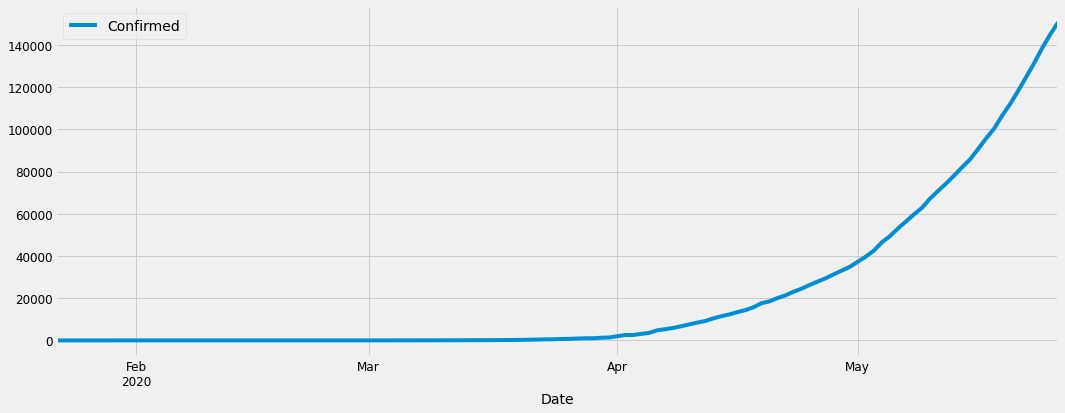

In [34]:
Ind.plot(figsize=(16, 6))
plt.show()